## SVM - Visualizing the effect of different C, gamma and kernel values

Small C value lets the SVM create a smooth decision surfaces, whereas a high C value instructs the SVM to classify the training data as perfect as possible $\rightarrow$ overfitting, since no errors are allowed ().<br>
The $\gamma$ value is a scaling factor. It regulates the influence of a single training data samples to the ones near by. For a large $\gamma$ value, a sample effects only very close other samples. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from helpers import create_plot, create_sub_plot, create_random_2d_dataset_2classes

%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 12, 'figure.figsize': (20, 15)})
np.random.seed(42)

#### Load the random data set
Data: 2 features, 2 classes. <br>
Class 0: Values for both features drawn from a normal distribution with $\mu = 1.0,\sigma=2.0$ <br>
Class 1: Values for both features drawn from a normal distribution with $\mu = 4.0,\sigma=1.0$

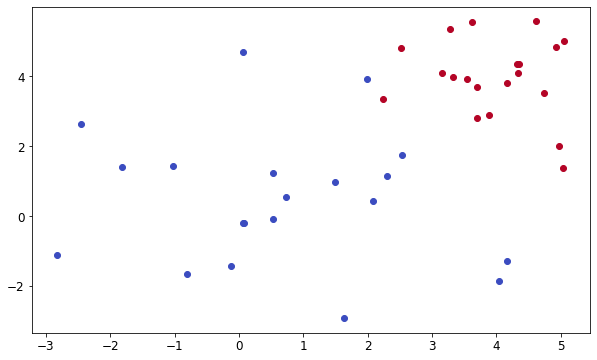

In [3]:
random_data_matrix = create_random_2d_dataset_2classes(save=True)

random_data_matrix = np.load('random_data_matrix.npy', allow_pickle=False, fix_imports=False)
data_1 = random_data_matrix[np.where(random_data_matrix[:, -1] == 0)[0], :]
data_2 = random_data_matrix[np.where(random_data_matrix[:, -1] == 1)[0], :]
cm = plt.cm.get_cmap('coolwarm', 2)
fig = plt.figure(figsize=(10,6))
plt.scatter(data_1[:, 0],data_1[:, 1], c=np.array([cm(0)]))
plt.scatter(data_2[:, 0],data_2[:, 1], c=np.array([cm(1)]))
plt.show()

#### Visualization of the RBF function with differen values for $\gamma$
$k(x) = \exp(-\gamma \cdot ||x||^2)$

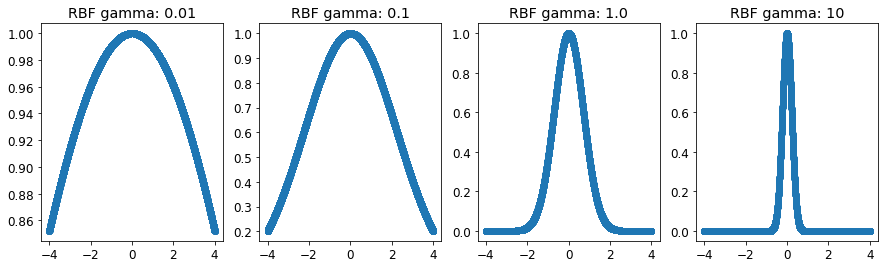

In [4]:
gamma_values = [0.01, 0.1, 1.0, 10]
fig_rbf, axs_rbf = plt.subplots(1, len(gamma_values), figsize=(15,4))
data_rbf = np.arange(-4, 4, 0.001)
for i, g in enumerate(gamma_values):
    res = np.exp(- g * np.power(np.abs(data_rbf), 2))
    axs_rbf[i].scatter(data_rbf, res)
    axs_rbf[i].set_title('RBF gamma: {}'.format(g))

#### Separate data matrix into data and labels

In [5]:
data = random_data_matrix[:, :-1]
labels = random_data_matrix[:, -1]

#### Linear Kernel:
$k(x, x') = \langle x, x'\rangle$

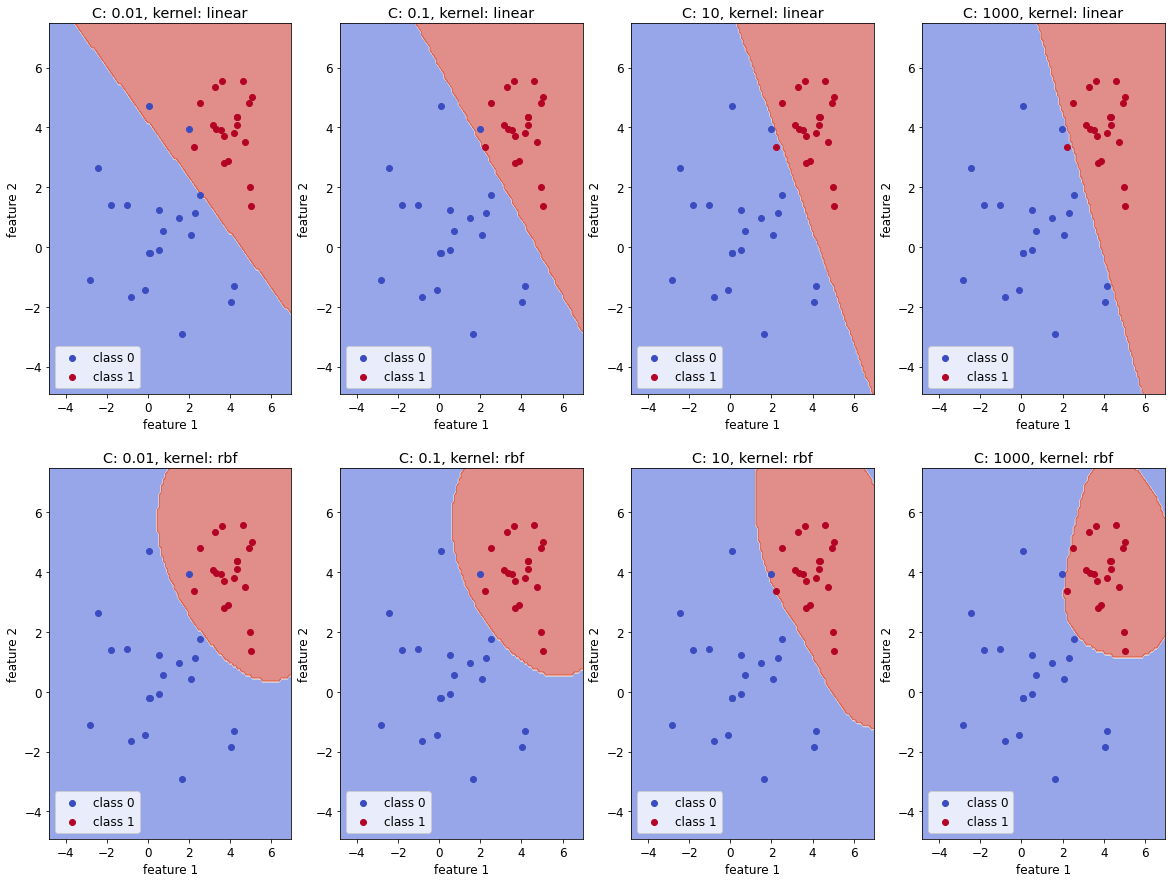

In [6]:
C_vals = [0.01, 0.1, 10, 1000]
kernels = ['linear', 'rbf']
fig, axs = plt.subplots(len(kernels), len(C_vals))
for j, k in enumerate(kernels):
    for i, c in enumerate(C_vals):
        clf = SVC(kernel=k, C=c)
        clf.fit(data, labels)
        create_sub_plot(data, labels, clf, axs[j, i], title='C: {}, kernel: {}'.format(c, k), legend_loc='lower left')

#### RBF Kernel:
$k(x, x') = \exp(-\gamma \cdot ||x - x'||^2)$

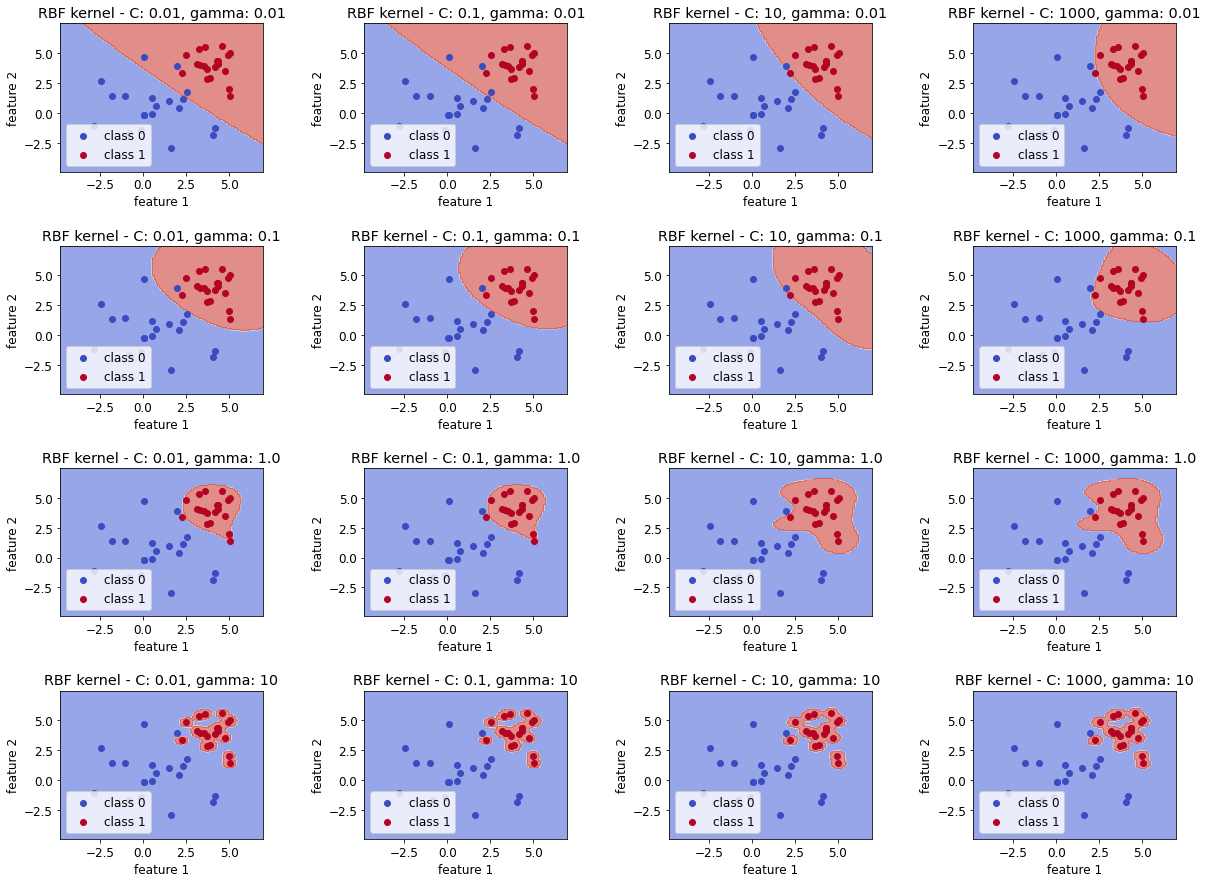

In [7]:
C_vals = [0.01, 0.1, 10, 1000]
gamma_values = [0.01, 0.1, 1.0, 10]
kernel = 'rbf'
fig, axs = plt.subplots(len(gamma_values), len(C_vals))
for j, g in enumerate(gamma_values):
    for i, c in enumerate(C_vals):
        clf = SVC(kernel=kernel, C=c, gamma=g)
        clf.fit(data, labels)
        create_sub_plot(data, labels, clf, axs[j, i], title='RBF kernel - C: {}, gamma: {}'.format(c, g), legend_loc='lower left')
plt.subplots_adjust(hspace=0.5, wspace=0.5)

#### Sigmoid Tanh Kernel:

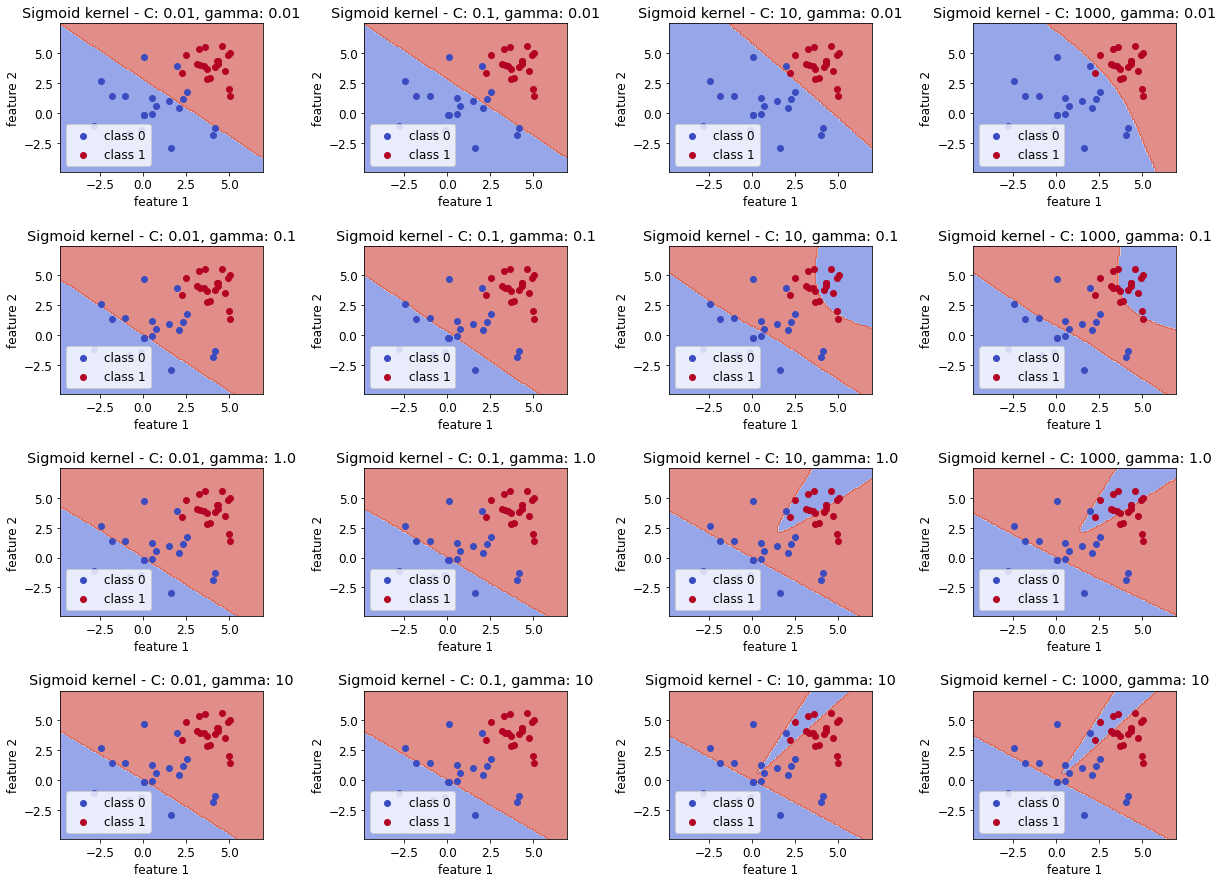

In [8]:
C_vals = [0.01, 0.1, 10, 1000]
gamma_values = [0.01, 0.1, 1.0, 10]
kernel = 'sigmoid'
fig, axs = plt.subplots(len(gamma_values), len(C_vals))
for j, g in enumerate(gamma_values):
    for i, c in enumerate(C_vals):
        clf = SVC(kernel=kernel, C=c, gamma=g)
        clf.fit(data, labels)
        create_sub_plot(data, labels, clf, axs[j, i], title='Sigmoid kernel - C: {}, gamma: {}'.format(c, g), legend_loc='lower left')
plt.subplots_adjust(hspace=0.5, wspace=0.5)

#### Polynomial kernel 2nd degree

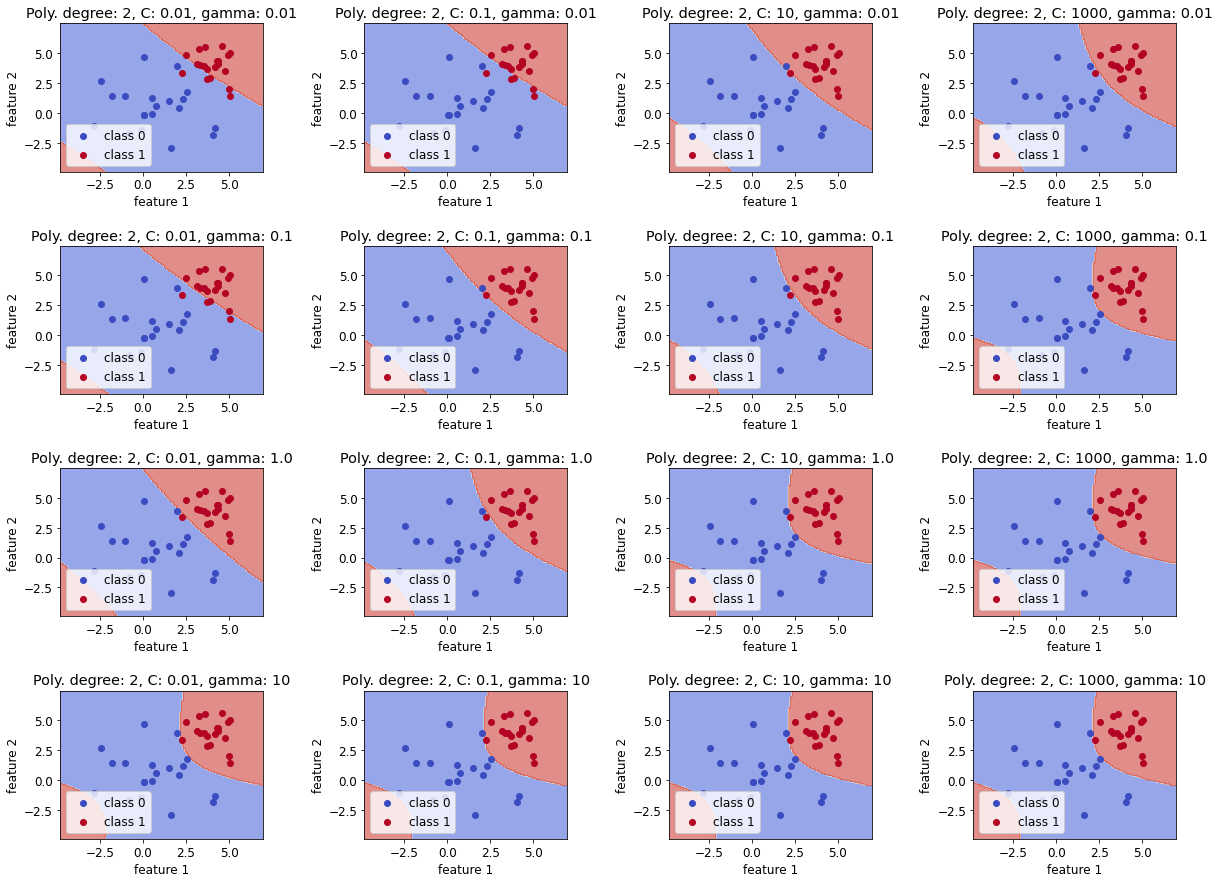

In [9]:
C_vals = [0.01, 0.1, 10, 1000]
gamma_values = [0.01, 0.1, 1.0, 10]
kernel = 'poly'
degree = 2
fig, axs = plt.subplots(len(gamma_values), len(C_vals))
for j, g in enumerate(gamma_values):
    for i, c in enumerate(C_vals):
        clf = SVC(kernel=kernel, C=c, gamma=g, degree=degree)
        clf.fit(data, labels)
        create_sub_plot(data, labels, clf, axs[j, i], title='Poly. degree: {}, C: {}, gamma: {}'.format(degree, c, g), legend_loc='lower left')
plt.subplots_adjust(hspace=0.5, wspace=0.5)

#### Polynomial kernel 3nd degree

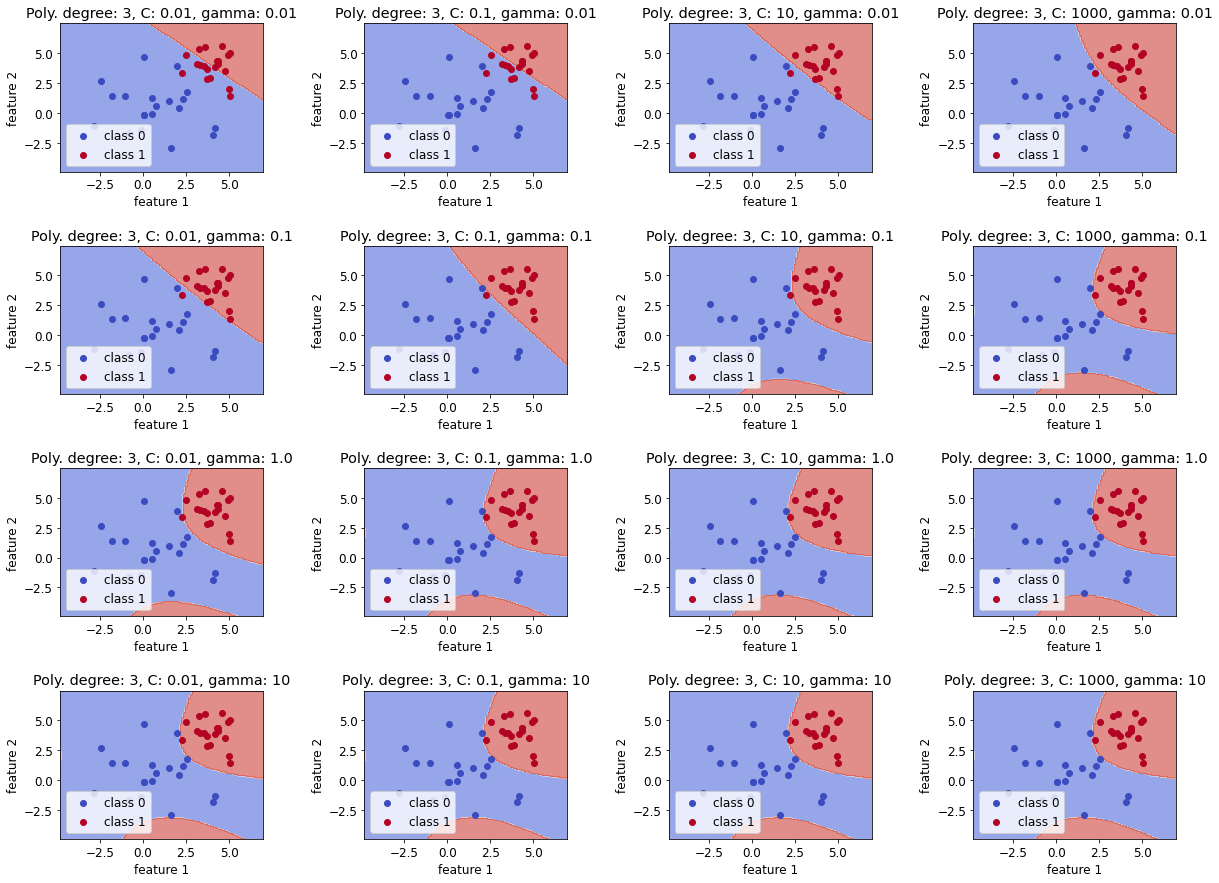

In [10]:
C_vals = [0.01, 0.1, 10, 1000]
gamma_values = [0.01, 0.1, 1.0, 10]
kernel = 'poly'
degree = 3
fig, axs = plt.subplots(len(gamma_values), len(C_vals))
for j, g in enumerate(gamma_values):
    for i, c in enumerate(C_vals):
        clf = SVC(kernel=kernel, C=c, gamma=g, degree=degree)
        clf.fit(data, labels)
        create_sub_plot(data, labels, clf, axs[j, i], title='Poly. degree: {}, C: {}, gamma: {}'.format(degree, c, g), legend_loc='lower left')
plt.subplots_adjust(hspace=0.5, wspace=0.5)